In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
store=pd.read_excel('/home/astin/Documents/MypythonBriefcase/visual/superstore/superstore_09bda538-16bc-4a44-900e-e9aa17815298.xls')


### importado los datos 

In [3]:
store.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## questions 
- which are the states with more sales 

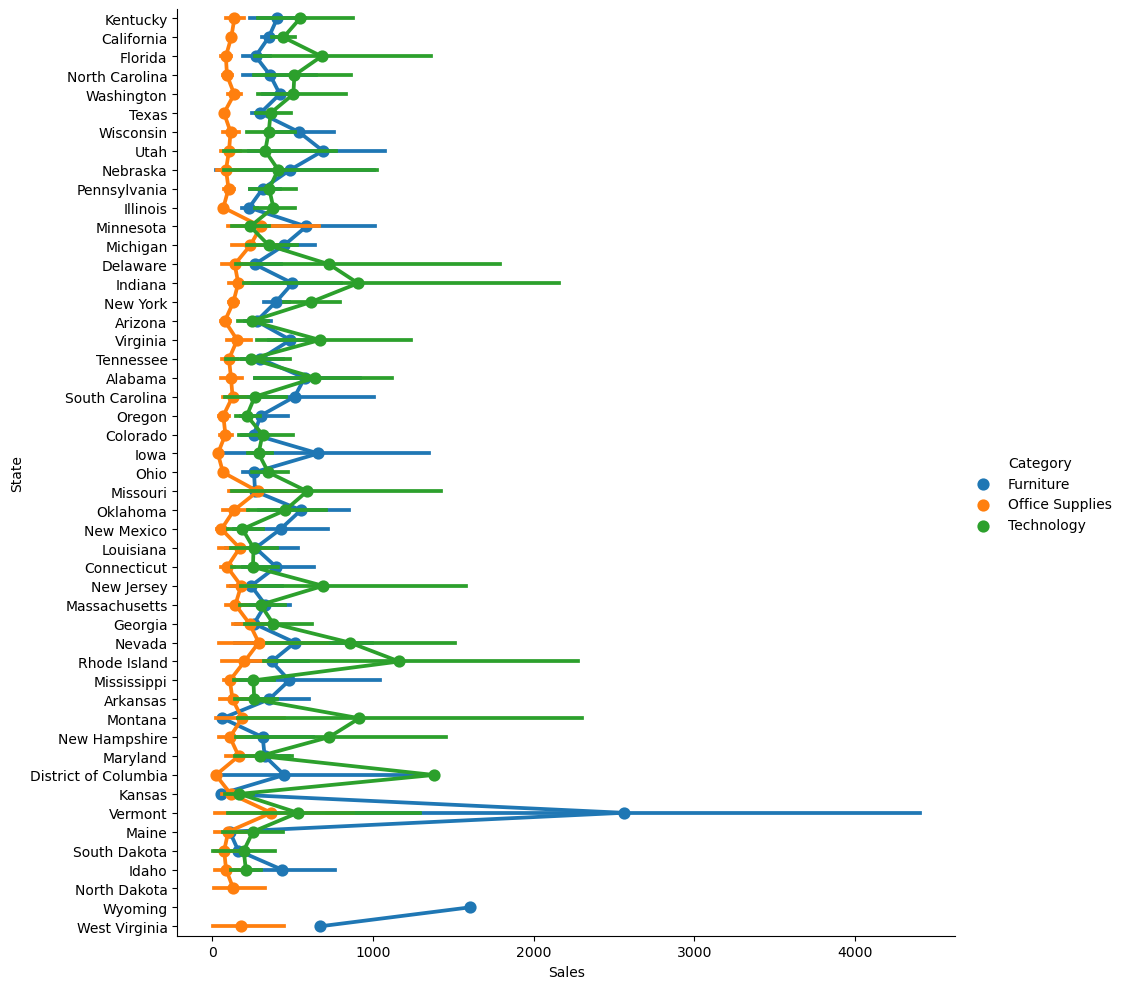

In [5]:
sns.catplot(data=store,x='Sales',y='State',height=10,hue='Category',kind='point');

### which categories has more sales 


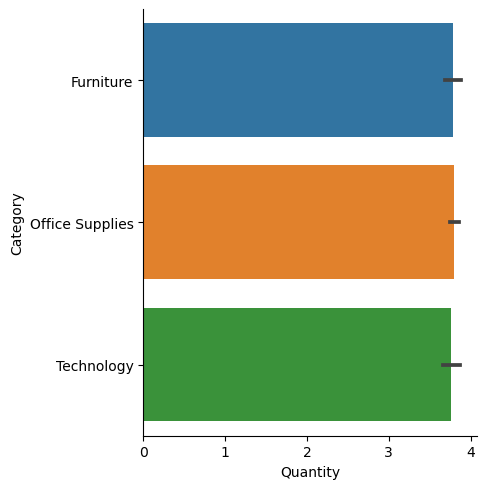

In [6]:
sns.catplot(data=store,x='Quantity',y='Category',kind='bar');

*we can se which category has mores sales than another*

### which categories has more sales than the other categories by region 

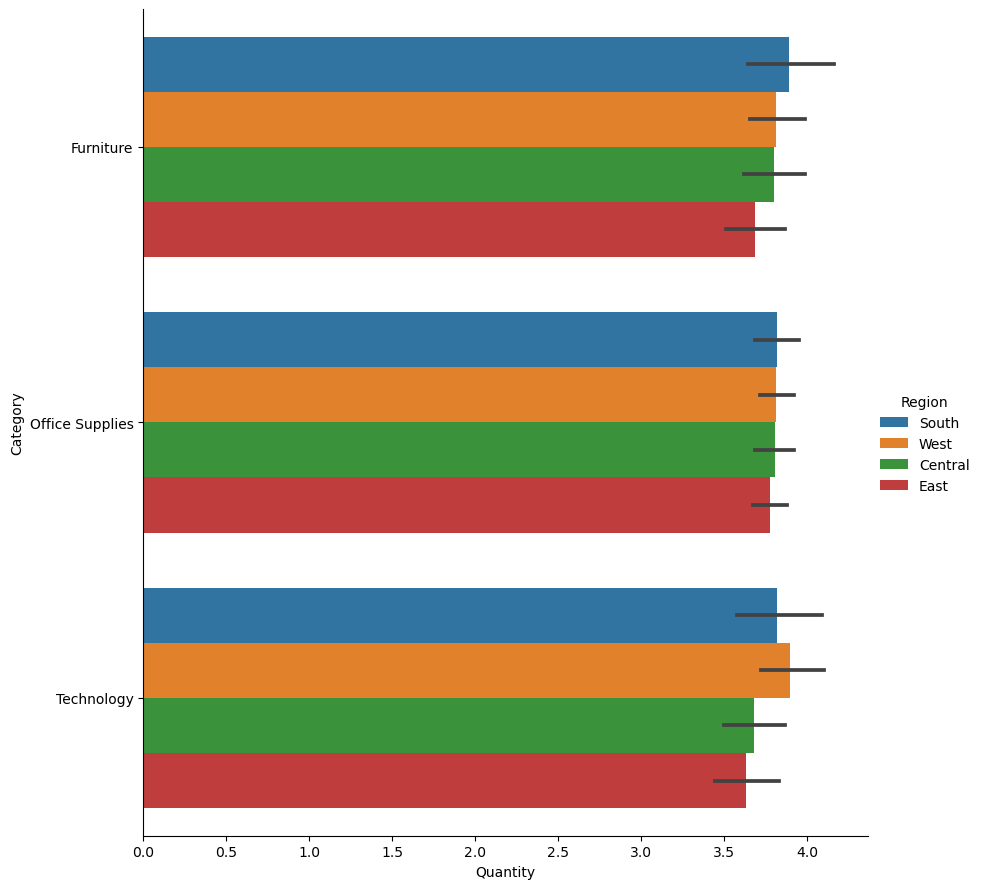

In [7]:
sns.catplot(data=store,x='Quantity',y='Category', hue='Region',height=9,kind='bar');

### Category with the highest profit

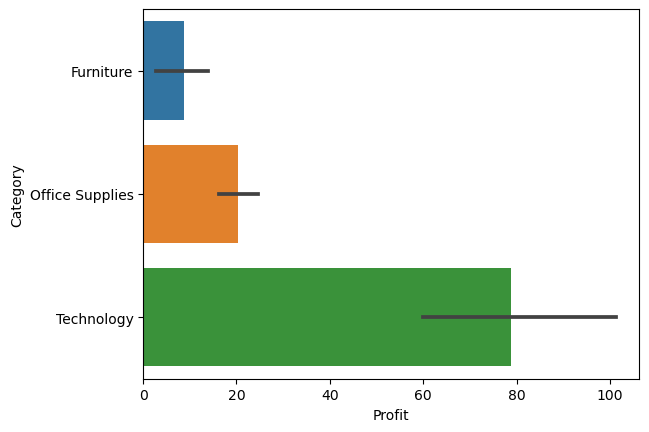

In [8]:
sns.barplot(data=store, y='Category',x='Profit');

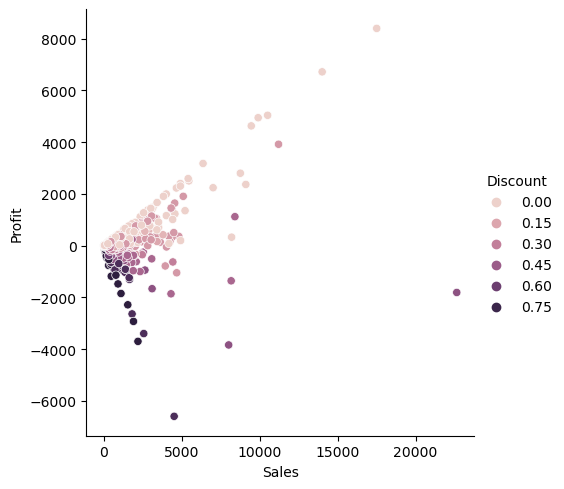

In [10]:
sns.relplot(data=store,y='Profit',x='Sales',hue='Discount');

*relation betwend a profit and discount for the sales* 

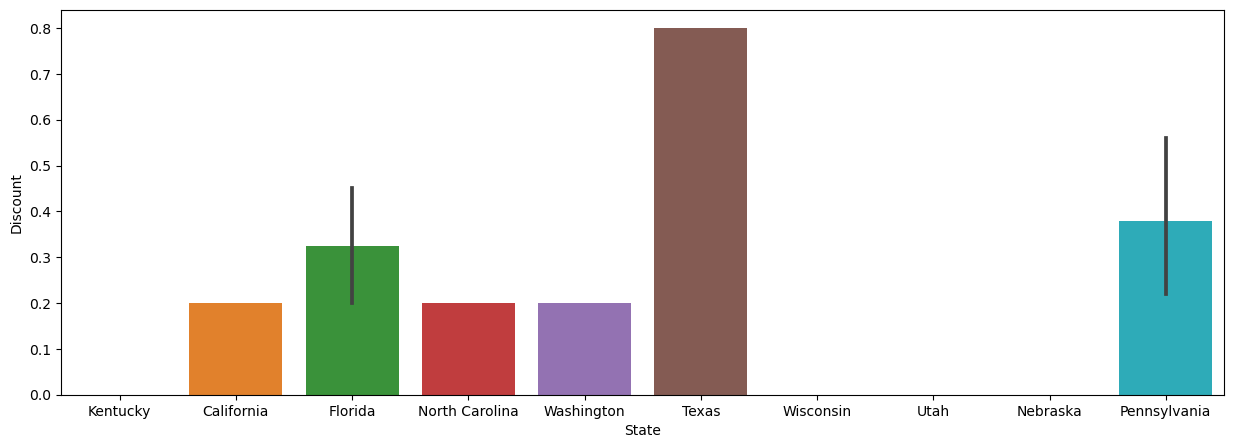

In [11]:
dis=store.sort_values(by='Discount',ascending=False).loc[:30,'Discount']
sta=store.loc[:30,'State']
plt.figure(figsize=(15,5))## es como podemos expandir los graficos
sns.barplot( x=sta, y=dis);


*we can see the state whit higher discount*

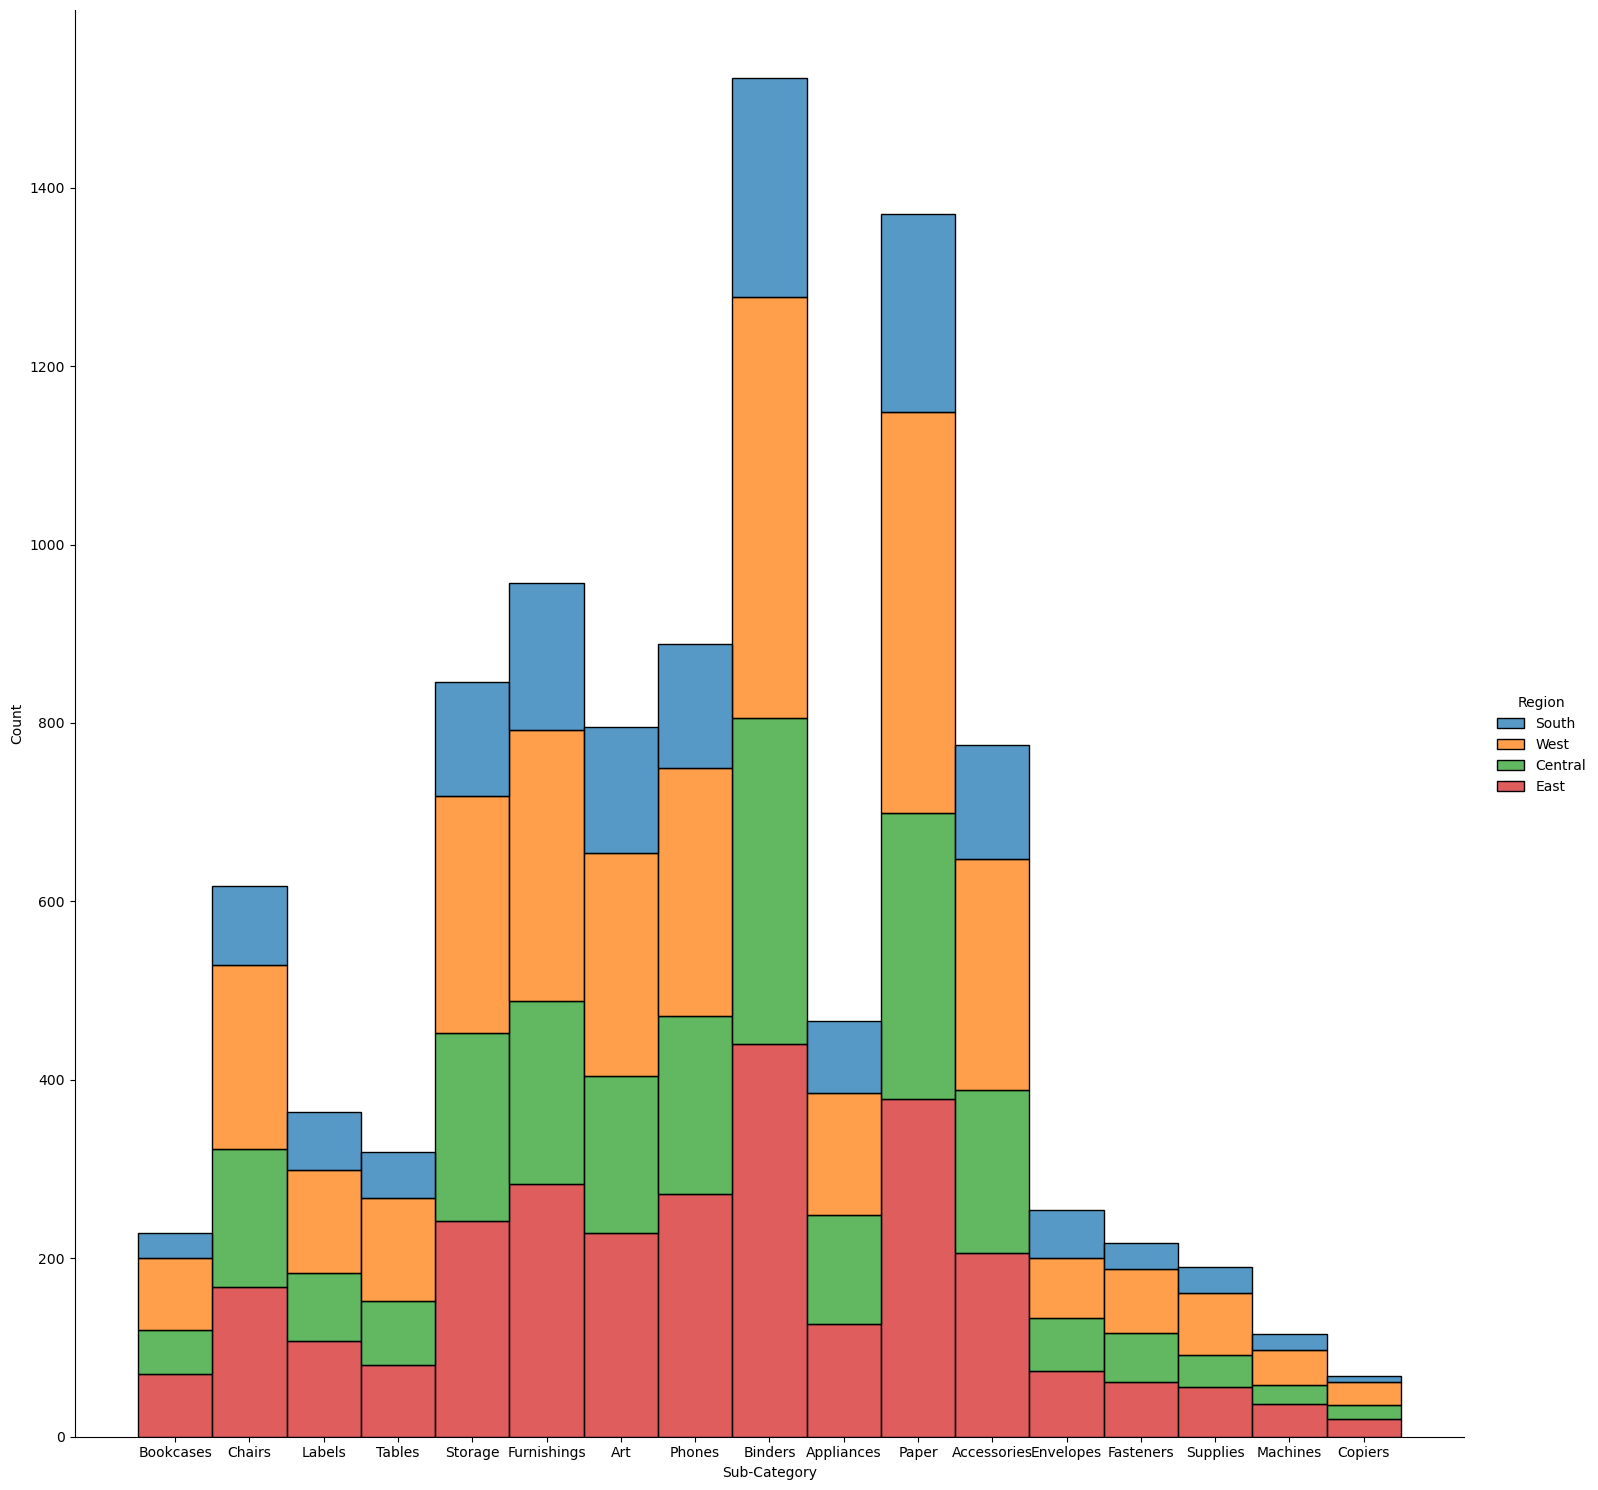

In [12]:
sns.displot(data=store[:],x='Sub-Category',height=15,hue='Region',multiple="stack");

### porcent of used of ship mode organiza by region 


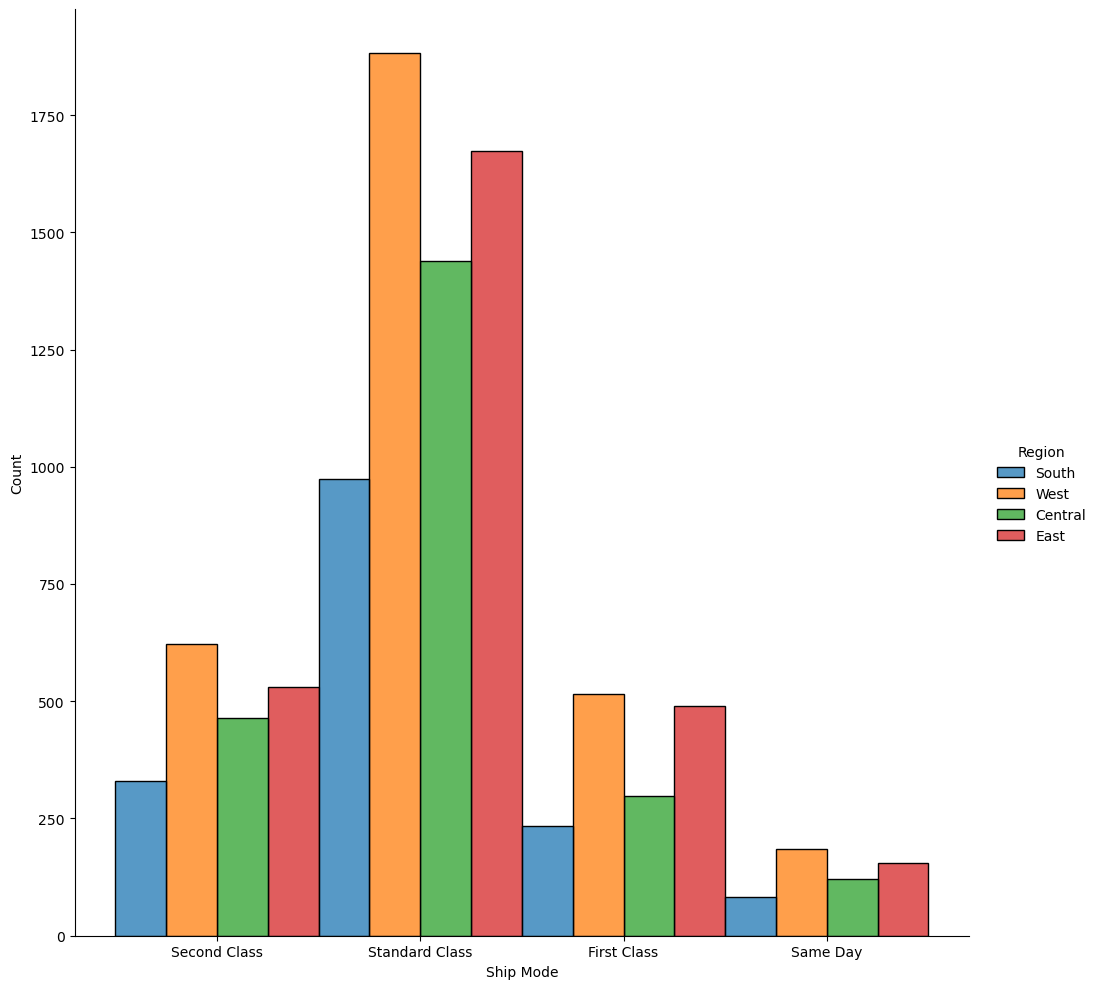

In [13]:
sns.displot(data=store, x="Ship Mode", hue='Region',height=10,multiple='dodge');

### relstion between the profit and sales hue by region 


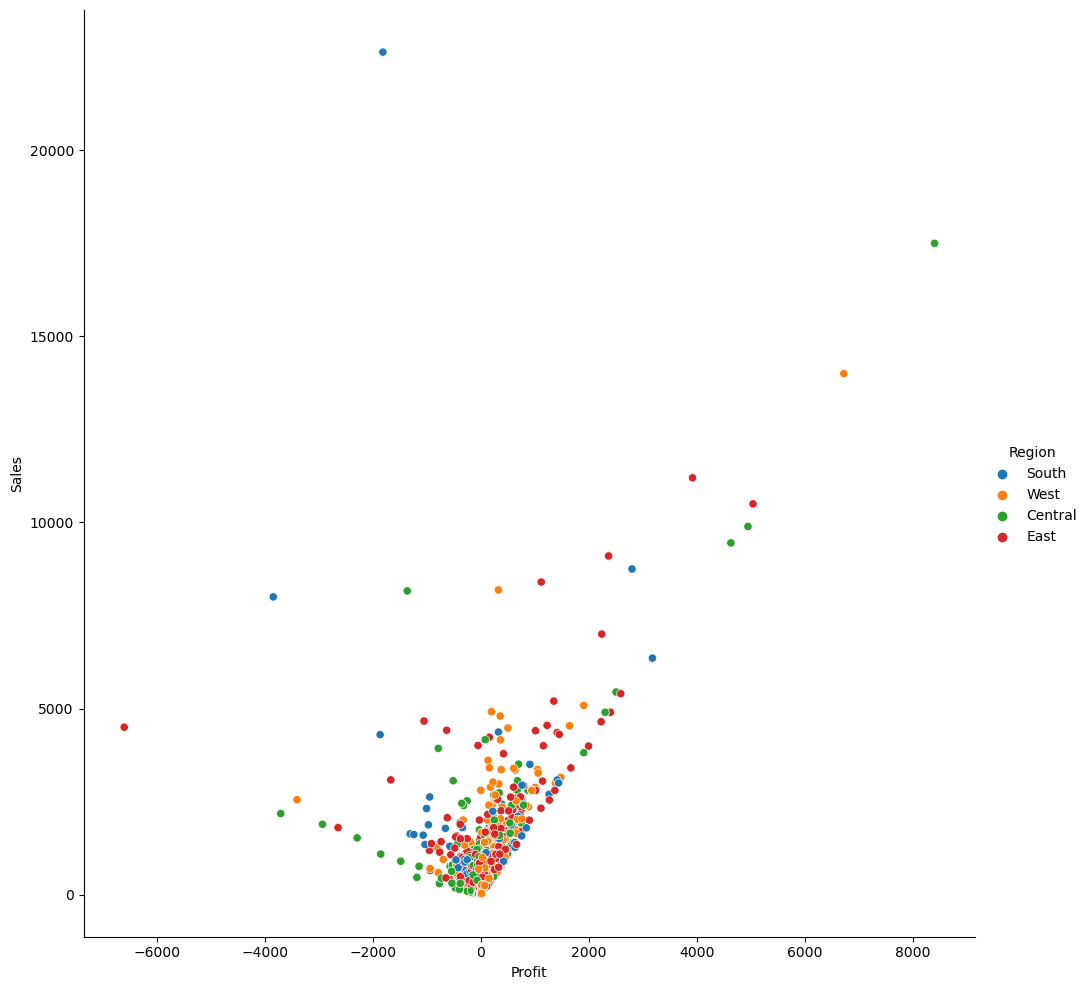

In [14]:
sns.relplot(data=store[:], x="Profit",y='Sales',hue='Region', height=10);

### Days to resive a packet


In [15]:
order=store.loc[:,'Order Date']
ship=store.loc[:,'Ship Date']
days=ship-order
days=days / np.timedelta64(1, 'D')## tenemos que apremder mas de funciones de tiempo esto es una tipo de dato de fecha 
#lo que haces dividr el valor alamacenado en la variable por el numero que vale un dia en timedelta64
print(days)

0       3.0
1       3.0
2       4.0
3       7.0
4       7.0
       ... 
9989    2.0
9990    5.0
9991    5.0
9992    5.0
9993    5.0
Length: 9994, dtype: float64


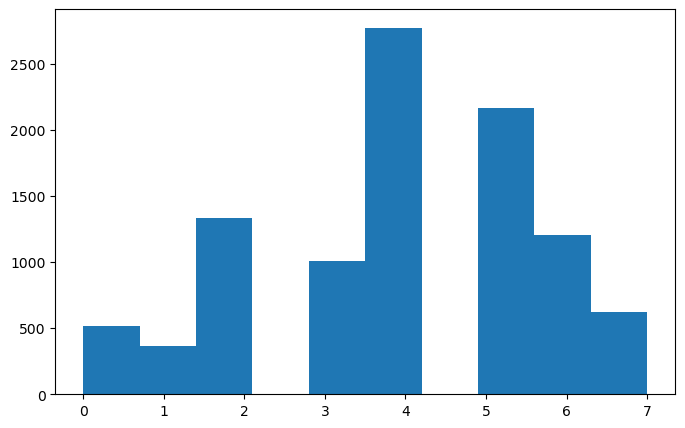

In [16]:
fig, axes= plt.subplots(figsize=(8,5))
axes.hist(days);


*We have the time to resive a packet*

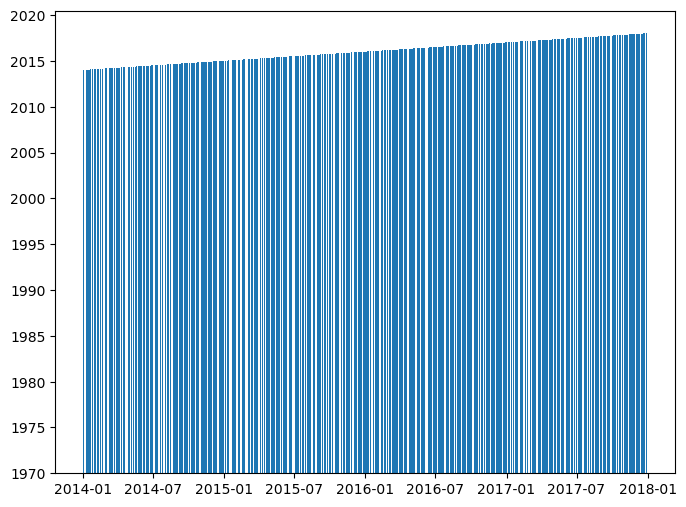

In [20]:
store.loc[:,'Order Date']
fig, axes= plt.subplots(figsize=(8,6))
axes.bar(store.loc[:,'Order Date'],store.loc[:,'Ship Date']);## we can use loc to more easily
